## Explanatory Analysis ##

Contuning with the question - i.e. How can our model helps support and augment health workers where hospital bed demand exists - Multivariate analysis did show a positive relationship between increase in bed availability across the poverty level.

To explain this findings, I will use the Cluster analysis technique. 

- Cluster analysis, starting with top 5 states in poverty to help the model analyze the type of hospitals that have available bed capacity and their utlization.

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
import seaborn as sb
import os
import wget

%matplotlib inline

In [2]:
# Load the dataset
pot_beds_df = pd.read_csv('poverty-beds-df.csv')

In [3]:
# Lets get the top 5 states in poverty.
pot_beds_df.sort_values('PCT_POVALL_2018').drop_duplicates('STATE_NAME').nlargest(5, 'PCT_POVALL_2018')[['STATE_NAME', 'HQ_STATE']]

,STATE_NAME,HQ_STATE
359,District of Columbia,DC
87,Arizona,AZ
1409,New Mexico,NM
900,Louisiana,LA
347,Delaware,DE


In [4]:
# Build a dataset for the top 5 state in poverty.
top_povery_states = pot_beds_df.sort_values('PCT_POVALL_2018').drop_duplicates('HQ_STATE').nlargest(5, 'PCT_POVALL_2018')[['HQ_STATE']].HQ_STATE
top_povery_stbeds_df = pot_beds_df[pot_beds_df['HQ_STATE'].isin(top_povery_states)]
top_povery_stbeds_df.reset_index(drop=True, inplace=True)
top_povery_stbeds_df.sample(n=5)

,Unnamed: 0,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,...,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,POTNL_INC_BED_CAPC,AVG_VENTILATOR_USAGE,PCT_BED_UTILIZATION,PCT_POTNL_INC_BED_CAPC,PCT_POVALL_2018
130,3307,-108.216808,36.723762,2562,San Juan Regional Medical Center,Short Term Acute Care Hospital,801 W Maple St,NaN,Farmington,NM,...,184.0,10,10,0.0,0.515783,10,9.0,51.578319,5.154639,23.1
13,166,-112.372801,33.660311,155,Banner Del E Webb Medical Center,Short Term Acute Care Hospital,14502 W Meeker Blvd,NaN,Sun City West,AZ,...,314.0,34,34,0.0,0.522956,80,7.0,52.295613,20.304569,12.3
36,235,-112.481113,34.559343,189,Yavapai Regional Medical Center - West,Short Term Acute Care Hospital,1003 Willow Creek Rd,NaN,Prescott,AZ,...,134.0,26,26,0.0,0.553997,72,7.0,55.399656,34.951456,13.2
77,2107,-92.266343,30.682407,1646,Mercy Regional Medical Center,Short Term Acute Care Hospital,800 E Main St,NaN,Ville Platte,LA,...,99.0,14,14,0.0,0.330317,10,2.0,33.031687,9.174312,27.3
131,3310,-105.210786,35.623578,2564,Alta Vista Regional Hospital,Short Term Acute Care Hospital,104 Legion Dr,NaN,Las Vegas,NM,...,46.0,8,8,0.0,0.211257,8,2.0,21.125670,14.814815,28.2


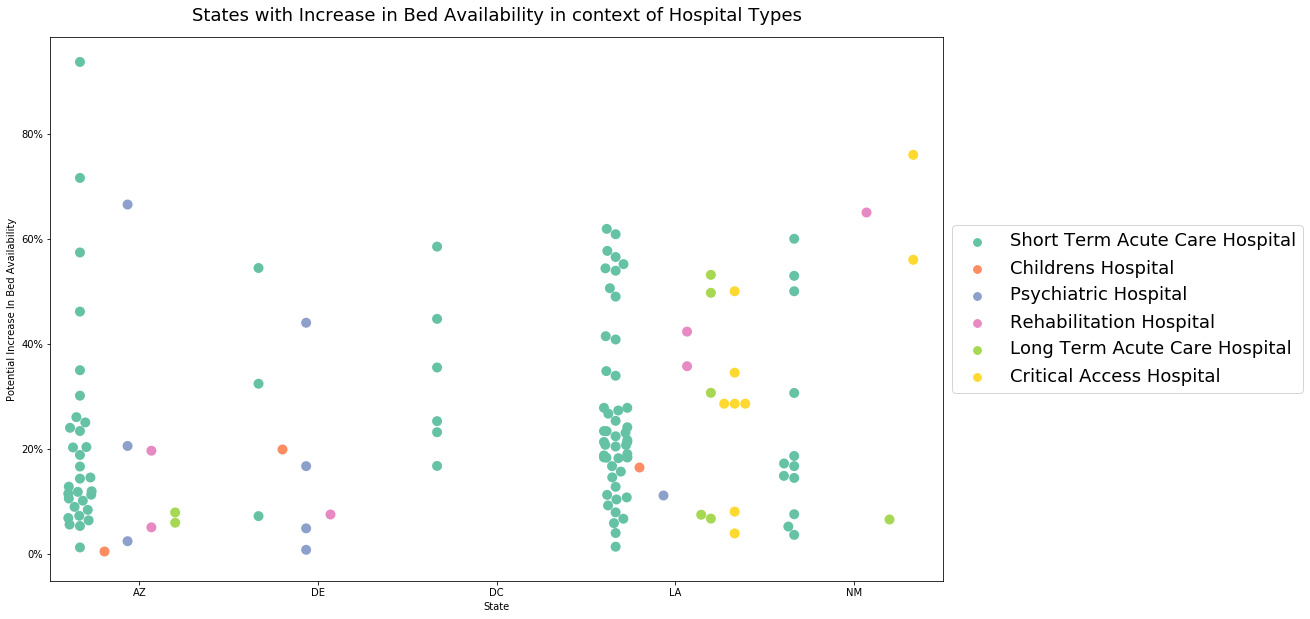

In [5]:
#Get a breakdown on available bed availability by hospital type given the high poverty level states.
plt.figure(figsize=[16,10])
g = sb.swarmplot(x="HQ_STATE", y="PCT_POTNL_INC_BED_CAPC", hue="HOSPITAL_TYPE",data=top_povery_stbeds_df, 
    palette="Set2", dodge=True,  size=10)
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5), fontsize=18)
plt.xlabel('State')
plt.ylabel('Potential Increase In Bed Availability')
g.set_title('States with Increase in Bed Availability in context of Hospital Types', fontdict={'fontsize':18}, pad=16)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

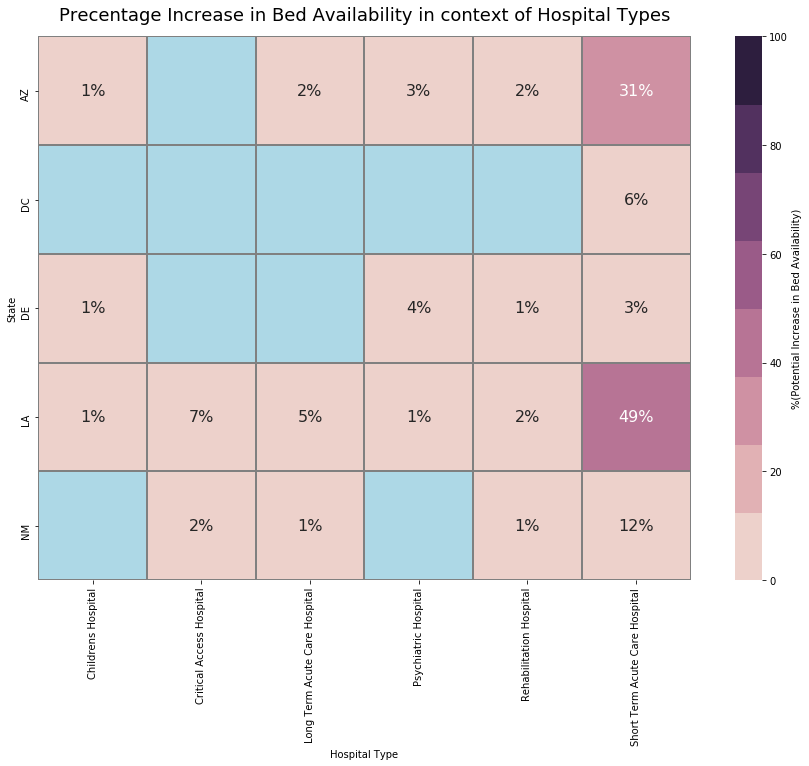

In [6]:
# What percentage increase in bed availability do we see across states and hospital types?
fig,ax = plt.subplots(figsize = [16,10])

cat_counts = top_povery_stbeds_df.groupby(['HOSPITAL_TYPE', 'HQ_STATE']).count()['PCT_POTNL_INC_BED_CAPC']
cat_counts = cat_counts.reset_index(name = 'num_var2_avg')
cat_counts = cat_counts.pivot(index = 'HQ_STATE', columns = 'HOSPITAL_TYPE',
                            values = 'num_var2_avg')
cmap = sb.cubehelix_palette(8)
g= sb.heatmap(cat_counts, annot = True,
            vmin=0, vmax=100, linewidths=1, linecolor='grey', square=True, cmap=cmap, annot_kws={"fontsize":16},
           cbar_kws = {'label' : '%(Potential Increase in Bed Availability)'})
g.set_facecolor('lightblue')           
g.set_title('Precentage Increase in Bed Availability in context of Hospital Types', fontdict={'fontsize':18}, pad=16)
for t in ax.texts: t.set_text(t.get_text() + "%")
plt.xlabel('Hospital Type')
plt.ylabel('State')
plt.show()

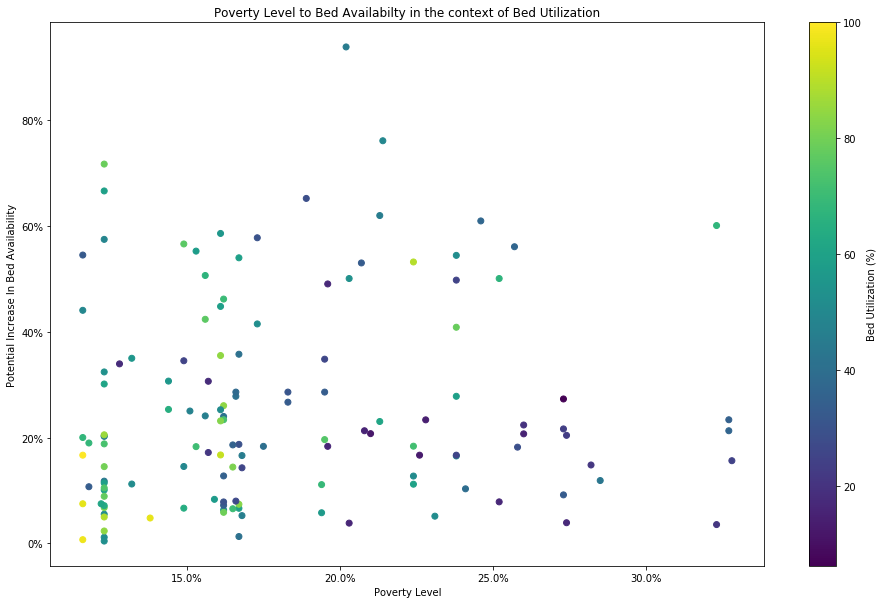

In [7]:
# What percentage of bed utilization do we see for the given availability of beds for people across the poverty level?
fig,ax = plt.subplots(figsize = [16,10])
plt.scatter(data=top_povery_stbeds_df, x='PCT_POVALL_2018', y='PCT_POTNL_INC_BED_CAPC',
            c='PCT_BED_UTILIZATION',
            cmap = 'viridis',
            )

# plt.xlim(2,22)
# plt.ylim(0,100)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Bed Utilization (%)')
plt.xlabel('Poverty Level')
plt.ylabel('Potential Increase In Bed Availability')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Poverty Level to Bed Availabilty in the context of Bed Utilization')
plt.show()

In [8]:
# What is the median percentage of Bed utilization by Hospital type?

top_povery_stbeds_df.groupby(['HOSPITAL_TYPE'])['PCT_BED_UTILIZATION'].agg(['median']).sort_values(['median']).rename(
    columns={'median' : 'PCT_BED_UTILIZATION'})

,PCT_BED_UTILIZATION
HOSPITAL_TYPE,
Critical Access Hospital,33.457536
Short Term Acute Care Hospital,49.089497
Childrens Hospital,52.673608
Long Term Acute Care Hospital,67.295036
Rehabilitation Hospital,75.594410
Psychiatric Hospital,85.111728


In [9]:
top_povery_stbeds_df.groupby(['HQ_STATE','HOSPITAL_TYPE'])['PCT_BED_UTILIZATION'].agg(['median']).sort_values(['HOSPITAL_TYPE']).reset_index().rename(
    columns={'median' : 'PCT_BED_UTILIZATION'})

,HQ_STATE,HOSPITAL_TYPE,PCT_BED_UTILIZATION
0,AZ,Childrens Hospital,52.673608
1,DE,Childrens Hospital,67.950475
2,LA,Childrens Hospital,51.566917
3,NM,Critical Access Hospital,43.213449
4,LA,Critical Access Hospital,31.265754
5,AZ,Long Term Acute Care Hospital,54.641140
6,NM,Long Term Acute Care Hospital,70.353281
7,LA,Long Term Acute Care Hospital,64.236790
8,AZ,Psychiatric Hospital,84.412587
9,DE,Psychiatric Hospital,97.163072


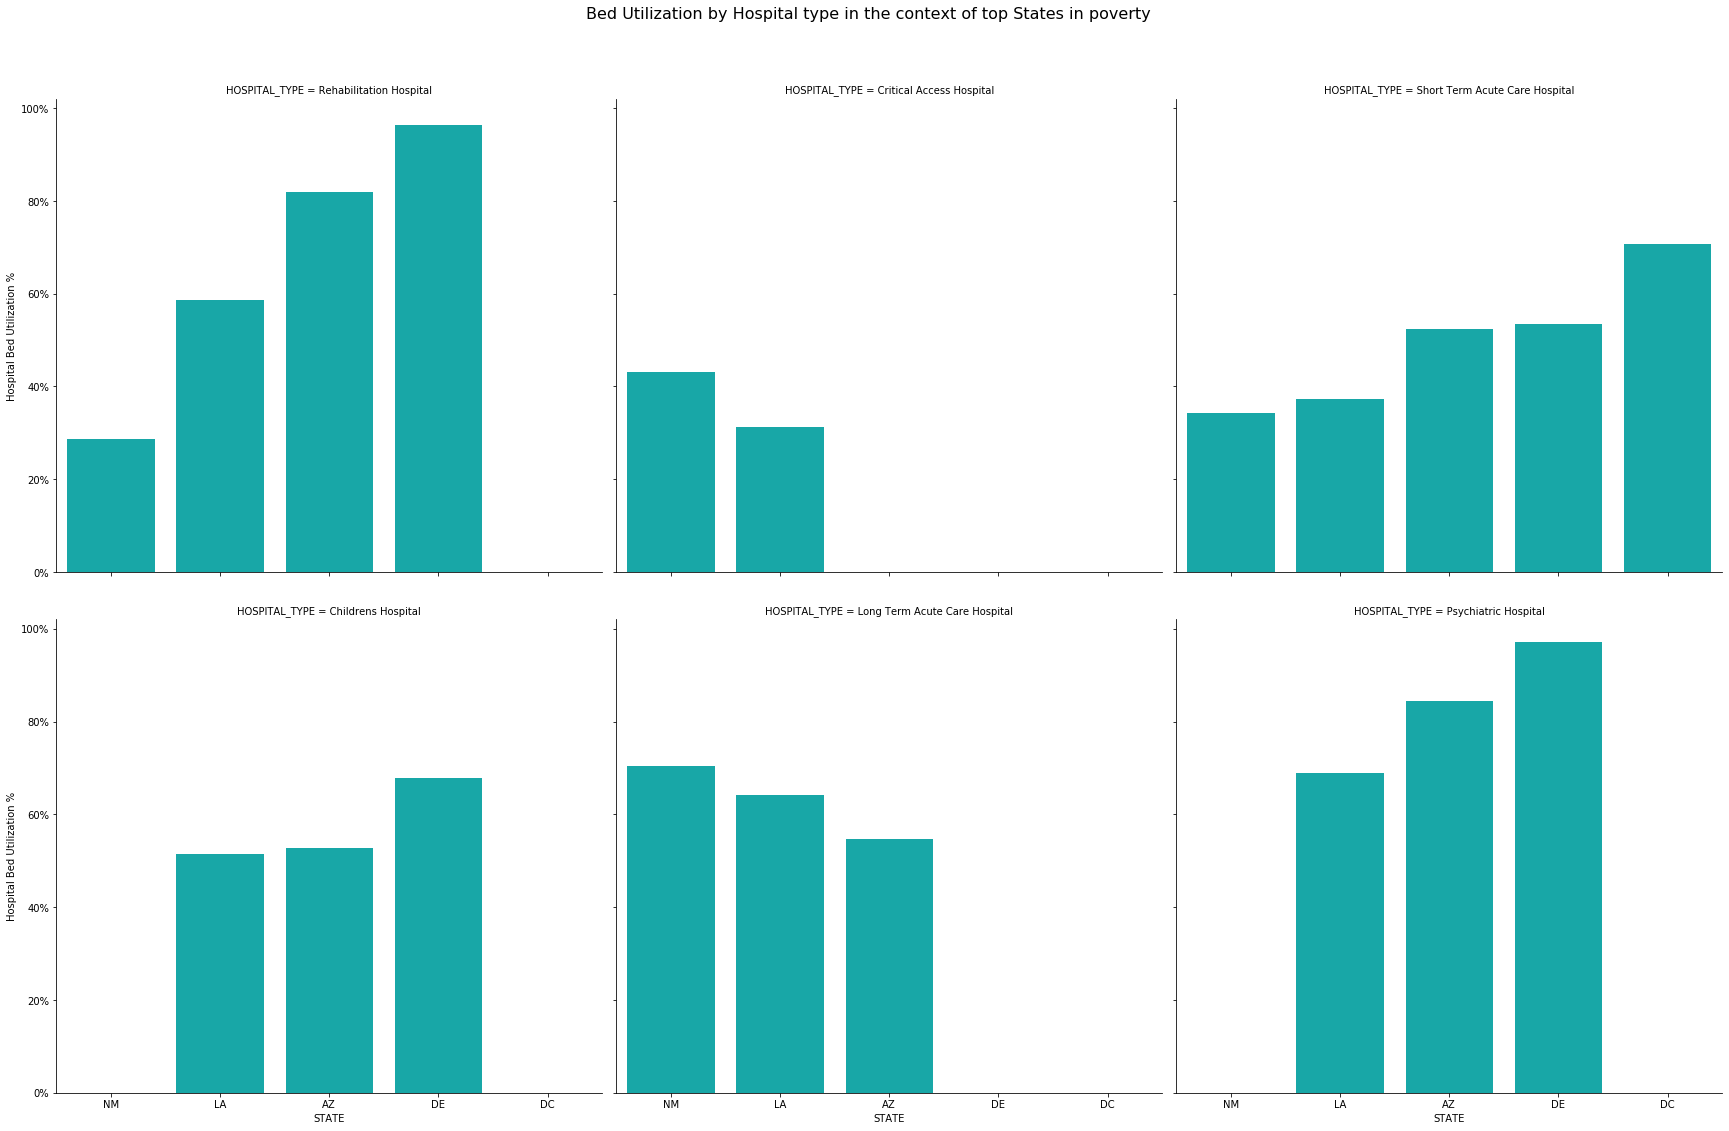

In [10]:
# Categorical view of bed utilization by hospital type and state. This provides a view into bed utilization by categorical columns.
cat_sorted_df = top_povery_stbeds_df.groupby(['HOSPITAL_TYPE','HQ_STATE'])['PCT_BED_UTILIZATION'].agg(['median']).sort_values(['median']).reset_index().rename(
    columns={'median' : 'PCT_BED_UTILIZATION'})

g = sb.catplot(x = "HQ_STATE", y = "PCT_BED_UTILIZATION", col="HOSPITAL_TYPE", col_wrap=3, kind="bar", data=cat_sorted_df, ci=None,   height=8, color="c", linewidth=2)
g.set_axis_labels("STATE", "Hospital Bed Utilization %")
plt.subplots_adjust(hspace = 0.1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.rcParams["axes.labelsize"] = 15
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Bed Utilization by Hospital type in the context of top States in poverty', fontsize=16)
plt.show()

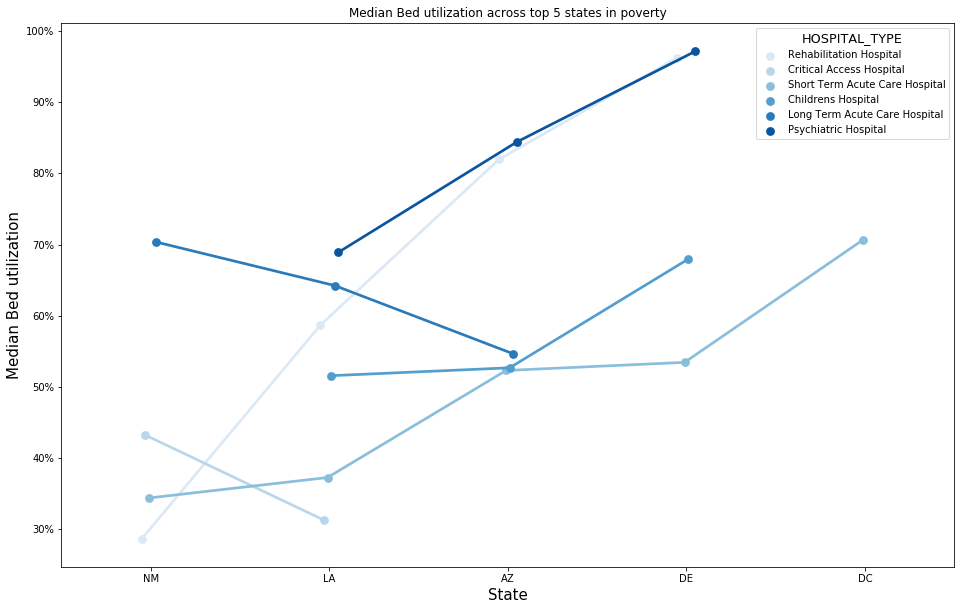

In [11]:
#Pointplot to with join lines to show the change in utilization.
fig,ax = plt.subplots(figsize = [16,10])
ax = sb.pointplot(data = cat_sorted_df, x = 'HQ_STATE', y = 'PCT_BED_UTILIZATION', hue = 'HOSPITAL_TYPE',
           palette = 'Blues', capsize=.2, dodge = 0.1, join=True, size=10, linewidth=2)
plt.title('Median Bed utilization across top 5 states in poverty')
plt.xlabel('State')
plt.ylabel('Median Bed utilization')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_yticklabels([],minor = True)
plt.show()

## Multivariate Analysis Findings ##

### Analysis on Hospital Bed Availability with reference to top 5 States in Poverty Level and hospital type ### 

- Short term acute care hospital are shown to have high bed availability across all 5 states. Louisiana and Arizona states have ** 49% ** and ** 31% ** of bed availability respectively. 
- ** District of Columbia ** has shown to be trailing in bed availability across all hospital types. A callout on this state being the top poverty state.
- Overall ** Louisiana state ** is shown to have high bed availability across all hospital types.
- ** Arizona state ** being the second highest poverty state stands second in high bed availability across all hospital types.

### Analysis on Bed Utilization with reference to top 5 States in Poverty Level and Hospital type ### 

- Psychiatric hospital type are the top utilized hospitals at ** 85% **. This utilization is distributed between Delaware, Arizona and Louisiana states.
- Short Term Acute Care hospital type (shown high bed availability) utilization is at ** 49% ** across all 5 states. ** District of Columbia ** topping the utilization.
- Childrens Hospital, Long Term Acute Care Hospital and Rehabilitation Hospital respectively have high bed utilization percentages.
- New Mexico and Arizona states have only shown the Median Bed utilization for Critical Access Hospital at ** 33%**.

# Conclusion: Findings and Next Steps #

To better understand how socioeconomic status - such as populations living in federal poverty area impact hospital bed utilization and to help optimize scenario planning for when staff can be shifted around to serve those living in federal poverty areas.

Historical Bed Utilization Rate, Poverty Level, Potential available in Bed capacity are key features that can help forecast the staffing needs of health workers (doctors, nurses etc). The staffing needs to a specific hospital type can be scored based on the availability enabling counties in poverty to be better served.

As next steps, building a machine learning model that helps support and augment health workers where demand exists by integrating with existing staff scheduling system allowing managers to view the model recommendations, allowing healthcare stakeholders deliver better patient care and improving productivity.